编制程序实现基于划分的聚类，分别用K-Means聚类算法、小批量K均值聚类算法(MiniBatchKMeans)进行聚类，并根据聚类结果进行分析。

**聚类**  
聚类(Clustering)是按照某个特定标准(如距离)把一个数据集分割成不同的类或簇，使得同一个簇内的数据对象的相似性尽可能大，  
同时不在同一个簇中的数据对象的差异性也尽可能地大。  
**区别**
- 聚类(Clustering)：是指把相似的数据划分到一起，具体划分的时候并不关心这一类的标签，  
目标就是把相似的数据聚合到一起，聚类是一种无监督学习(Unsupervised Learning)方法。
- 分类(Classification)：是把不同的数据划分开，其过程是通过训练数据集获得一个分类器，  
再通过分类器去预测未知数据，分类是一种监督学习(Supervised Learning)方法

**划分式聚类方法**  
划分式聚类方法需要事先指定簇类的数目或者聚类中心，通过反复迭代，直至最后达到"簇内的点足够近，簇间的点足够远"的目标。  
经典的划分式聚类方法有k-means及其变体k-means++, bi-kmeans, kernel, k-means等

### 一. 对亚洲男足20强国家队进行聚类

In [90]:
# 加载数据
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("../data/class06/football_data.csv")
x_train = data[["2019年国际排名", "2018世界杯", "2015亚洲杯"]]
# 归一化
x_train = MinMaxScaler().fit_transform(x_train)
# K-means算法, 指定3个类别
model = KMeans(n_clusters=3, n_init="auto")
model.fit(x_train)
y_predict = model.predict(x_train)
# pd.concat 连接多个数据表
result = pd.concat((data,pd.DataFrame({"聚类":y_predict})),axis=1)
print(result)


        国家  2019年国际排名  2018世界杯  2015亚洲杯  聚类
0       中国         73       40        7   2
1       日本         60       15        5   0
2       韩国         61       19        2   0
3       伊朗         34       18        6   0
4       沙特         67       26       10   0
5      伊拉克         91       40        4   2
6      卡塔尔        101       40       13   1
7      阿联酋         81       40        6   2
8   乌兹别克斯坦         88       40        8   2
9       泰国        122       40       17   1
10      越南        102       50       17   1
11      阿曼         87       50       12   1
12      巴林        116       50       11   1
13      朝鲜        110       50       14   1
14      印尼        164       50       17   1
15      澳洲         40       30        1   0
16     叙利亚         76       40       17   1
17      约旦        118       50        9   2
18     科威特        100       50       15   1
19    巴勒斯坦         96       50       16   1


### 二.采用小批量K均值聚类算法对鸢尾花数据集进行聚类

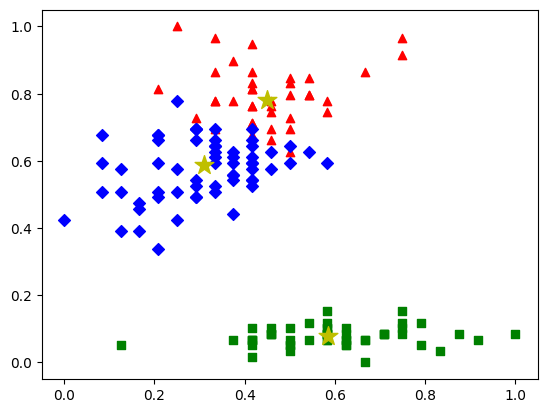

In [91]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# 数据加载
iris = load_iris()
x_data = iris.data
y_label = iris.target
# 数据预处理
x_data = MinMaxScaler().fit_transform(x_data)

model_clf = MiniBatchKMeans(n_clusters= 3, batch_size= 15, init="random", n_init=3)
# 模型拟合
model_clf.fit(x_data)
centers = model_clf.cluster_centers_
pre_clu = model_clf.labels_

# 对不同的簇进行标记
marker_dict = {0:'^', 1:'s', 2:'D'}
color_dict = {0:'r', 1:'g', 2:'b'}
mark_val = [marker_dict[i] for i in pre_clu]
color_val = [color_dict[i] for i in pre_clu]

for x, y, mark, color in zip(x_data[:,1],x_data[:,2], mark_val, color_val):
    plt.scatter(x, y, marker=mark,c=color)
plt.scatter(centers[:,1],centers[:,2],marker='*',s=200,c='y')
plt.show()